<a href="https://colab.research.google.com/github/monitor81/Datasets/blob/master/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D0%98%D0%A2%D0%9C%D0%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Итоговый проект по программе повышения квалификации "Аналитик данных (Data Scientist)"
### Выполнила: Карманова Екатерина Владимировна

### Название: Потеряшки города Магнитогорска

Идея проекта: Построить визуальную карту с метками, где и что теряют жители города Магнитогорска.

Этапы проекта:
* Сбор:
1. Собрать данные о "потеряшках", используя посты сообщества "Потеряшки Магнитогорск" - https://vk.com/public146384981.
* Анализ, предобработка:
2. Проанализировать и предобработать полученные данные.
3. Изучить, в какое время года, месяц и неделю теряют вещи жители 
больше всего.
4. Получить из постов адреса, где теряют и находят вещи жители.
5. Получить названия объектов/предметов (что теряют жители города).
6. Изучить, что больше всего теряют жители.
* Построение географиской карты потерь и находок
7. На основе адресов получить географические координаты мест потерь и находок жителей
8. Отобразить метки на карте, вывести, сколько потеряшек, находок на данном участке.
* Кластеризация постов
9. Узнать, какие предметы ищут или нашли жители, по каждому посту
10. Узнать, о чем пост: о находке или потеряшке.
11. Провести кластеризацию постов (по 2 кластерам). 
12. Проверить гипотезу, разделит ли метод k_means все посты на "потеряшки" и "найденные предметы". 




In [ ]:
!pip install geopy
!pip install folium
!pip install vk_api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48 kB 4.2 MB/s 


In [ ]:
import vk_api
import json
import time
import folium
import requests
import numpy as np
import pandas as pd
from google.colab import drive
from geopy.geocoders import Nominatim
from geopy.geocoders import ArcGIS


import matplotlib.pyplot as plt


geolocator = ArcGIS()
drive.mount('/content/drive/')

Mounted at /content/drive/


### Сбор данных с использованием API VK 


In [ ]:
with open('/content/drive/My Drive/datasets/personal.json') as f:
  d = json.load(f)
  login = d['login']
  password = d['password']

vk_session = vk_api.VkApi(login, password)
vk_session.auth()

vk = vk_session.get_api()
data = []
timing = time.time()
i = 0
while i < 500:
  if(time.time() - timing > 1):
    timing = time.time()
    of = i * 100
    data.extend(vk.wall.get(owner_id = -146384981, count = 100, offset=of)['items'])
    i += 1

### Сохранение в файл json

In [ ]:
import json

In [ ]:
with open("/content/drive/My Drive/datasets/VK_data_50000.json", "w") as outfile:
   json.dump(data, outfile)

### Считаем данные в датафрейм

In [ ]:
df = pd.read_json('/content/drive/My Drive/datasets/VK_data_50000.json')
df

,id,from_id,owner_id,date,marked_as_ads,is_favorite,post_type,text,is_pinned,post_source,...,reposts,views,hash,signer_id,attachments,zoom_text,edited,copy_history,copyright,geo
0,73591,-146384981,-146384981,2022-07-20 03:10:51,0,False,post,‼️В данном сообществе публикуем объявления‼️ :...,1.0,"{'platform': 'iphone', 'type': 'api'}",...,"{'count': 7, 'user_reposted': 0}",{'count': 25720},QvtzL4USyL9EEGH-FiPl3GQ0-w,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,82763,-146384981,-146384981,2022-12-05 10:02:36,0,False,post,"Найден кейс от наушников, возле магазина «Магн...",NaN,"{'platform': 'iphone', 'type': 'api'}",...,"{'count': 2, 'user_reposted': 0}",{'count': 1442},x2fLaDU5Y3cULa1EFoIefKBkGQ,302295411.0,"[{'type': 'photo', 'photo': {'album_id': -7, '...",NaN,NaN,NaN,NaN,NaN
2,82758,-146384981,-146384981,2022-12-04 19:46:24,0,False,post,"Здравствуйте, сегодня примерно 18:20 был утеря...",NaN,"{'platform': 'iphone', 'type': 'api'}",...,"{'count': 0, 'user_reposted': 0}",{'count': 2231},4SbpzPoqq-XRtfDlp6eF-8O0UQ,186852693.0,NaN,NaN,NaN,NaN,NaN,NaN
3,82755,-146384981,-146384981,2022-12-04 15:01:49,0,False,post,"Здравствуйте, сегодня примерно в 13:30 потерял...",NaN,"{'platform': 'iphone', 'type': 'api'}",...,"{'count': 1, 'user_reposted': 0}",{'count': 1701},PSCqpjrUp6W3QaE6J_vxGAxWnw,NaN,"[{'type': 'photo', 'photo': {'album_id': -7, '...",NaN,NaN,NaN,NaN,NaN
4,82754,-146384981,-146384981,2022-12-04 14:59:11,0,False,post,Уважаемые подписчики группы. Утерян телефон и ...,NaN,"{'platform': 'iphone', 'type': 'api'}",...,"{'count': 1, 'user_reposted': 0}",{'count': 1231},HKcIhF5wL9oKRWhsGAlhU6DBsQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25465,7,-146384981,-146384981,2017-05-08 17:53:31,0,False,post,"Вы нашли какую то вещь? (Ключи, документы, ном...",NaN,{'type': 'mvk'},...,"{'count': 21, 'user_reposted': 0}",{'count': 55400},D8OQ2ocHK2H_N0F-SMnBd3q6WA,NaN,"[{'type': 'photo', 'photo': {'album_id': -7, '...",NaN,NaN,NaN,NaN,NaN
25466,5,-146384981,-146384981,2017-05-07 14:43:48,0,False,post,,NaN,"{'platform': 'android', 'type': 'api'}",...,"{'count': 4, 'user_reposted': 0}",{'count': 1895},oqqk2tdCi7sJwGahDgDV0zKUdQ,NaN,NaN,NaN,NaN,"[{'id': 752436, 'owner_id': -49177878, 'from_i...",NaN,NaN
25467,4,-146384981,-146384981,2017-05-06 05:23:48,0,False,post,"Если вы потеряли или нашли какую либо вещь, до...",NaN,{'type': 'vk'},...,"{'count': 0, 'user_reposted': 0}",{'count': 1803},u3Wm4nLSP9RQG_ZAvrFSZyBmww,NaN,"[{'type': 'photo', 'photo': {'album_id': -7, '...",NaN,NaN,NaN,NaN,NaN
25468,3,-146384981,-146384981,2017-05-05 18:43:40,0,False,post,Добро пожаловать в группу потеряшки Магнитогор...,NaN,{'type': 'vk'},...,"{'count': 1, 'user_reposted': 0}",{'count': 1791},9Wsf0EytIQThv2Ks_rB5rG5mvw,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25470 entries, 0 to 25469
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             25470 non-null  int64         
 1   from_id        25470 non-null  int64         
 2   owner_id       25470 non-null  int64         
 3   date           25470 non-null  datetime64[ns]
 4   marked_as_ads  25470 non-null  int64         
 5   is_favorite    25470 non-null  bool          
 6   post_type      25470 non-null  object        
 7   text           25470 non-null  object        
 8   is_pinned      1 non-null      float64       
 9   post_source    25470 non-null  object        
 10  comments       25470 non-null  object        
 11  likes          25470 non-null  object        
 12  reposts        25470 non-null  object        
 13  views          25470 non-null  object        
 14  hash           25470 non-null  object        
 15  signer_id      2471

### Удаляем ненужные столбцы

In [ ]:
df.drop(columns = ['zoom_text', 'edited', 'copy_history', 'copyright', 'geo', 'from_id', 'owner_id','marked_as_ads', 'is_pinned',
                   'hash', 'signer_id', 'post_source', 'post_type','is_favorite', 'attachments'], inplace = True)

In [ ]:
df

,id,date,text,comments,likes,reposts,views
0,73591,2022-07-20 03:10:51,‼️В данном сообществе публикуем объявления‼️ :...,"{'can_post': 1, 'count': 5, 'groups_can_post':...","{'can_like': 1, 'count': 11, 'user_likes': 0, ...","{'count': 7, 'user_reposted': 0}",{'count': 25720}
1,82763,2022-12-05 10:02:36,"Найден кейс от наушников, возле магазина «Магн...","{'can_post': 1, 'count': 0, 'groups_can_post':...","{'can_like': 1, 'count': 7, 'user_likes': 0, '...","{'count': 2, 'user_reposted': 0}",{'count': 1442}
2,82758,2022-12-04 19:46:24,"Здравствуйте, сегодня примерно 18:20 был утеря...","{'can_post': 1, 'count': 0, 'groups_can_post':...","{'can_like': 1, 'count': 17, 'user_likes': 0, ...","{'count': 0, 'user_reposted': 0}",{'count': 2231}
3,82755,2022-12-04 15:01:49,"Здравствуйте, сегодня примерно в 13:30 потерял...","{'can_post': 1, 'count': 0, 'groups_can_post':...","{'can_like': 1, 'count': 9, 'user_likes': 0, '...","{'count': 1, 'user_reposted': 0}",{'count': 1701}
4,82754,2022-12-04 14:59:11,Уважаемые подписчики группы. Утерян телефон и ...,"{'can_post': 1, 'count': 0, 'groups_can_post':...","{'can_like': 1, 'count': 8, 'user_likes': 0, '...","{'count': 1, 'user_reposted': 0}",{'count': 1231}
...,...,...,...,...,...,...,...
25465,7,2017-05-08 17:53:31,"Вы нашли какую то вещь? (Ключи, документы, ном...","{'can_post': 1, 'count': 2, 'groups_can_post':...","{'can_like': 1, 'count': 127, 'user_likes': 0,...","{'count': 21, 'user_reposted': 0}",{'count': 55400}
25466,5,2017-05-07 14:43:48,,"{'can_post': 1, 'count': 0, 'groups_can_post':...","{'can_like': 1, 'count': 9, 'user_likes': 0, '...","{'count': 4, 'user_reposted': 0}",{'count': 1895}
25467,4,2017-05-06 05:23:48,"Если вы потеряли или нашли какую либо вещь, до...","{'can_post': 1, 'count': 0, 'groups_can_post':...","{'can_like': 1, 'count': 3, 'user_likes': 0, '...","{'count': 0, 'user_reposted': 0}",{'count': 1803}
25468,3,2017-05-05 18:43:40,Добро пожаловать в группу потеряшки Магнитогор...,"{'can_post': 1, 'count': 0, 'groups_can_post':...","{'can_like': 1, 'count': 4, 'user_likes': 0, '...","{'count': 1, 'user_reposted': 0}",{'count': 1791}


### Изучаем полученные тексты постов на предмет повторяющихся записей

In [ ]:
df.text.value_counts()

#ПотеряшкиМагнитогорск                                                                                                                                                                                                                                                                                      761
                                                                                                                                                                                                                                                                                                            248
Найдена карта\n\n#ПотеряшкиМагнитогорск                                                                                                                                                                                                                                                                      60
Кто потерял?\n\n#ПотеряшкиМагнитогорск                                                  

### Удаляем тексты с хештегом сообщества

In [ ]:
df.drop(df[df.text == '#ПотеряшкиМагнитогорск'].index, inplace = True)


### Вытаскиваем в отдельные признаки количество лайков, комментариев, репостов и просмотров

In [ ]:
df.likes[0]

{'can_like': 1, 'count': 11, 'user_likes': 0, 'can_publish': 1}

In [ ]:
count_likes = [item['count'] for item in df.likes]

In [ ]:
df['count_likes']= count_likes

In [ ]:
df.comments[0]

{'can_post': 1, 'count': 5, 'groups_can_post': True}

In [ ]:
count_comments = [item['count'] for item in df.comments]

In [ ]:
df['count_comments']= count_comments

In [ ]:
count_repost = [item['count'] for item in df.reposts]

In [ ]:
df['count_repost']= count_repost

In [ ]:
count_views = [item['count'] for item in df.views]

In [ ]:
df['count_views ']= count_views

In [ ]:
# удаляем не нужные столбцы
df.drop (columns = ['likes', 'comments', 'reposts','views'], inplace = True)
df

,id,date,text,count_likes,count_comments,count_repost,count_views
0,73591,2022-07-20 03:10:51,‼️В данном сообществе публикуем объявления‼️ :...,11,5,7,25720
1,82763,2022-12-05 10:02:36,"Найден кейс от наушников, возле магазина «Магн...",7,0,2,1442
2,82758,2022-12-04 19:46:24,"Здравствуйте, сегодня примерно 18:20 был утеря...",17,0,0,2231
3,82755,2022-12-04 15:01:49,"Здравствуйте, сегодня примерно в 13:30 потерял...",9,0,1,1701
4,82754,2022-12-04 14:59:11,Уважаемые подписчики группы. Утерян телефон и ...,8,0,1,1231
...,...,...,...,...,...,...,...
25465,7,2017-05-08 17:53:31,"Вы нашли какую то вещь? (Ключи, документы, ном...",127,2,21,55400
25466,5,2017-05-07 14:43:48,,9,0,4,1895
25467,4,2017-05-06 05:23:48,"Если вы потеряли или нашли какую либо вещь, до...",3,0,0,1803
25468,3,2017-05-05 18:43:40,Добро пожаловать в группу потеряшки Магнитогор...,4,0,1,1791


### Анализируем полученные данные

In [ ]:
df.date.agg(['min', 'max']) # узнаем первую и послежнюю дату публикации поста в сообществе

min   2017-05-05 18:38:43
max   2022-12-05 10:02:36
Name: date, dtype: datetime64[ns]

In [ ]:
import seaborn as sns
import time
import datetime

In [ ]:
df['year'], df['month'], df['weekday'] = df['date'].dt.year, df['date'].dt.month, df['date'].dt.weekday

In [ ]:
df

,id,date,text,count_likes,count_comments,count_repost,count_views,year,month,weekday
0,73591,2022-07-20 03:10:51,‼️В данном сообществе публикуем объявления‼️ :...,11,5,7,25720,2022,7,2
1,82763,2022-12-05 10:02:36,"Найден кейс от наушников, возле магазина «Магн...",7,0,2,1442,2022,12,0
2,82758,2022-12-04 19:46:24,"Здравствуйте, сегодня примерно 18:20 был утеря...",17,0,0,2231,2022,12,6
3,82755,2022-12-04 15:01:49,"Здравствуйте, сегодня примерно в 13:30 потерял...",9,0,1,1701,2022,12,6
4,82754,2022-12-04 14:59:11,Уважаемые подписчики группы. Утерян телефон и ...,8,0,1,1231,2022,12,6
...,...,...,...,...,...,...,...,...,...,...
25465,7,2017-05-08 17:53:31,"Вы нашли какую то вещь? (Ключи, документы, ном...",127,2,21,55400,2017,5,0
25466,5,2017-05-07 14:43:48,,9,0,4,1895,2017,5,6
25467,4,2017-05-06 05:23:48,"Если вы потеряли или нашли какую либо вещь, до...",3,0,0,1803,2017,5,5
25468,3,2017-05-05 18:43:40,Добро пожаловать в группу потеряшки Магнитогор...,4,0,1,1791,2017,5,4


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


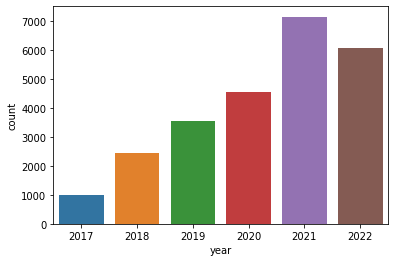

In [ ]:
sns.countplot(df.year, orient='h')

Количество постов ежегодно растет, похоже сообщество развивается. В 2022 году меньше постов, но и год еще не закончился.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


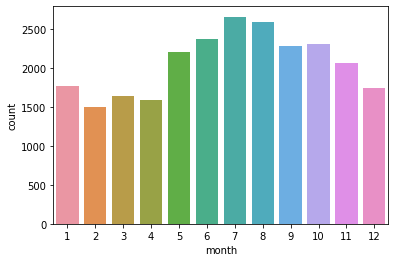

In [ ]:
sns.countplot(df.month, orient='h')

Больше всего постов в летние месяцы. Значит, находят и теряют в летние месяцы жители города больше всего.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


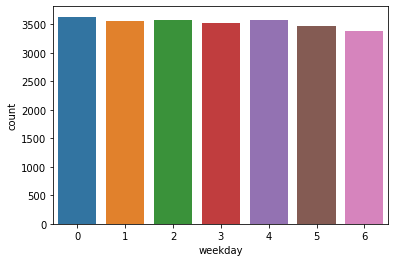

In [ ]:
sns.countplot(df.weekday, orient='h')

А вот день недели не важен

### Вытащим из текста постов адреса, где теряют или находят вещи люди. 

In [ ]:
!pip install natasha

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.4 MB 61 kB/s 
     |████████████████████████████████| 49 kB 3.6 MB/s 
     |████████████████████████████████| 55 kB 4.1 MB/s 
     |████████████████████████████████| 41 kB 137 kB/s 
     |████████████████████████████████| 8.2 MB 7.7 MB/s 
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26118 sha256=eb2de6fd8f3a055283df9ce57b3df575563c10ede9dcdc1514e66983d6c1a793
  Stored in directory: /root/.cache/pip/wheels/45/23/de/5789a92962483fd33cb06674792b9697c1b3766d7c7742830e
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=ea7a67744dc0f30db268f31bb31aadde8fc5dbc060122fdc44bb47a754dbaa65
  Stored in directory: /root/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built intervaltree docopt
  Attempting uninstall: intervaltree
    Found

In [ ]:
from natasha import AddrExtractor, MorphVocab

In [ ]:
morph_vocab = MorphVocab()
extractor = AddrExtractor(morph_vocab)

def fix_addr(text):
    matches = extractor(text)
    return (', '.join(f'{match.fact.type or ""} {match.fact.value}' for match in matches)) or None

df['address'] = df['text'].map(fix_addr)

In [ ]:
df

,id,date,text,count_likes,count_comments,count_repost,count_views,year,month,weekday,address
0,73591,2022-07-20 03:10:51,‼️В данном сообществе публикуем объявления‼️ :...,11,5,7,25720,2022,7,2,"находках, находках"
1,82763,2022-12-05 10:02:36,"Найден кейс от наушников, возле магазина «Магн...",7,0,2,1442,2022,12,0,None
2,82758,2022-12-04 19:46:24,"Здравствуйте, сегодня примерно 18:20 был утеря...",17,0,0,2231,2022,12,6,None
3,82755,2022-12-04 15:01:49,"Здравствуйте, сегодня примерно в 13:30 потерял...",9,0,1,1701,2022,12,6,None
4,82754,2022-12-04 14:59:11,Уважаемые подписчики группы. Утерян телефон и ...,8,0,1,1231,2022,12,6,None
...,...,...,...,...,...,...,...,...,...,...,...
25465,7,2017-05-08 17:53:31,"Вы нашли какую то вещь? (Ключи, документы, ном...",127,2,21,55400,2017,5,0,None
25466,5,2017-05-07 14:43:48,,9,0,4,1895,2017,5,6,None
25467,4,2017-05-06 05:23:48,"Если вы потеряли или нашли какую либо вещь, до...",3,0,0,1803,2017,5,5,None
25468,3,2017-05-05 18:43:40,Добро пожаловать в группу потеряшки Магнитогор...,4,0,1,1791,2017,5,4,Магнитогорск


In [ ]:
df.address.value_counts()

 Магнитогорск                 249
посёлок Крылова               118
проспект Ленина               101
посёлок Западный               66
посёлок Радужный               55
                             ... 
дом 178 и, улица Советской      1
проезд Сирененово               1
 Магнитогорск,  Оренбург        1
посёлок Ново                    1
улица Комсомольская и           1
Name: address, Length: 1383, dtype: int64

Адреса не во всех постах.
Адреса не полные, сложно будет построить карты потеряшек. 

In [ ]:
len(df.address.value_counts())

1383

In [ ]:
df.to_csv('/content/drive/My Drive/datasets/itmo_project_finding.csv')

In [ ]:
df = pd.read_csv('/content/drive/My Drive/datasets/itmo_project_finding.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24709 entries, 0 to 24708
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      24709 non-null  int64 
 1   id              24709 non-null  int64 
 2   date            24709 non-null  object
 3   text            24461 non-null  object
 4   count_likes     24709 non-null  int64 
 5   count_comments  24709 non-null  int64 
 6   count_repost    24709 non-null  int64 
 7   count_views     24709 non-null  int64 
 8   year            24709 non-null  int64 
 9   month           24709 non-null  int64 
 10  weekday         24709 non-null  int64 
 11  address         3951 non-null   object
dtypes: int64(9), object(3)
memory usage: 2.3+ MB


### Предобработка текстов постов

In [ ]:
df.text.fillna('', inplace = True)
df.drop(df[df.text ==''].index, inplace = True)

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

stop_words = set(stopwords.words('russian'))
##Creating a list of custom stopwords
new_words = ["просьба","очень","огромная","пожалуйста","здравствуйте","прошу", "просим","вознаграждение","районе"]
stop_words = list(stop_words.union(new_words))

def pre_process(text):
    
    text = re.sub('#ПотеряшкиМагнитогорск', '', text)

    # lowercase
    text=text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    # remove stopwords
    text = [word for word in text if word not in stop_words]

    # remove words less than three letters
    text = [word for word in text if len(word) >= 3]

    # lemmatize
    lmtzr = WordNetLemmatizer()
    text = [lmtzr.lemmatize(word) for word in text]
    
    return ' '.join(text)

In [ ]:
%%time
df['new_text'] = df['text'].apply(lambda x:pre_process(x)) 

CPU times: user 4.83 s, sys: 44.1 ms, total: 4.87 s
Wall time: 4.88 s


In [ ]:
df

,Unnamed: 0,id,date,text,count_likes,count_comments,count_repost,count_views,year,month,weekday,address,new_text
0,0,73591,2022-07-20 03:10:51,‼️В данном сообществе публикуем объявления‼️ :...,11,5,7,25720,2022,7,2,"находках, находках",данном сообществе публикуем объявления потерях...
1,1,82763,2022-12-05 10:02:36,"Найден кейс от наушников, возле магазина «Магн...",7,0,2,1442,2022,12,0,NaN,найден кейс наушников возле магазина магнит ра...
2,2,82758,2022-12-04 19:46:24,"Здравствуйте, сегодня примерно 18:20 был утеря...",17,0,0,2231,2022,12,6,NaN,сегодня примерно утерян телефон redmi lite моу...
3,3,82755,2022-12-04 15:01:49,"Здравствуйте, сегодня примерно в 13:30 потерял...",9,0,1,1701,2022,12,6,NaN,сегодня примерно потеряли телефон vsmart joy а...
4,4,82754,2022-12-04 14:59:11,Уважаемые подписчики группы. Утерян телефон и ...,8,0,1,1231,2022,12,6,NaN,уважаемые подписчики группы утерян телефон бан...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24702,25463,11,2017-05-10 05:54:36,Всем привет от ост.Юности до крытого рынка был...,3,0,1,1490,2017,5,2,NaN,всем привет ост юности крытого рынка утерена п...
24703,25464,9,2017-05-10 05:04:23,утеряны ключи от хундай т.89658597493,2,3,0,1443,2017,5,2,NaN,утеряны ключи хундай
24704,25465,7,2017-05-08 17:53:31,"Вы нашли какую то вещь? (Ключи, документы, ном...",127,2,21,55400,2017,5,0,NaN,нашли какую вещь ключи документы номер нашли с...
24706,25467,4,2017-05-06 05:23:48,"Если вы потеряли или нашли какую либо вещь, до...",3,0,0,1803,2017,5,5,NaN,потеряли нашли какую либо вещь документ животн...


In [ ]:
%%time
df['text'] = df['text'].apply(lambda x:pre_process(x)) 

CPU times: user 3.24 s, sys: 11.7 ms, total: 3.25 s
Wall time: 4.19 s


In [ ]:
!pip install collections

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for collection: filename=collection-0.1.6-py3-none-any.whl size=5116 sha256=98c1942f847e19d8fe717b5bd888e39c9bc8050164595d08503d57e6f6aa852b
  Stored in directory: /root/.cache/pip/wheels/3b/e0/fe/8e68dd2243f4e4741fd3950f2dbeb2fdf4b604767fde39598f
Successfully built collection


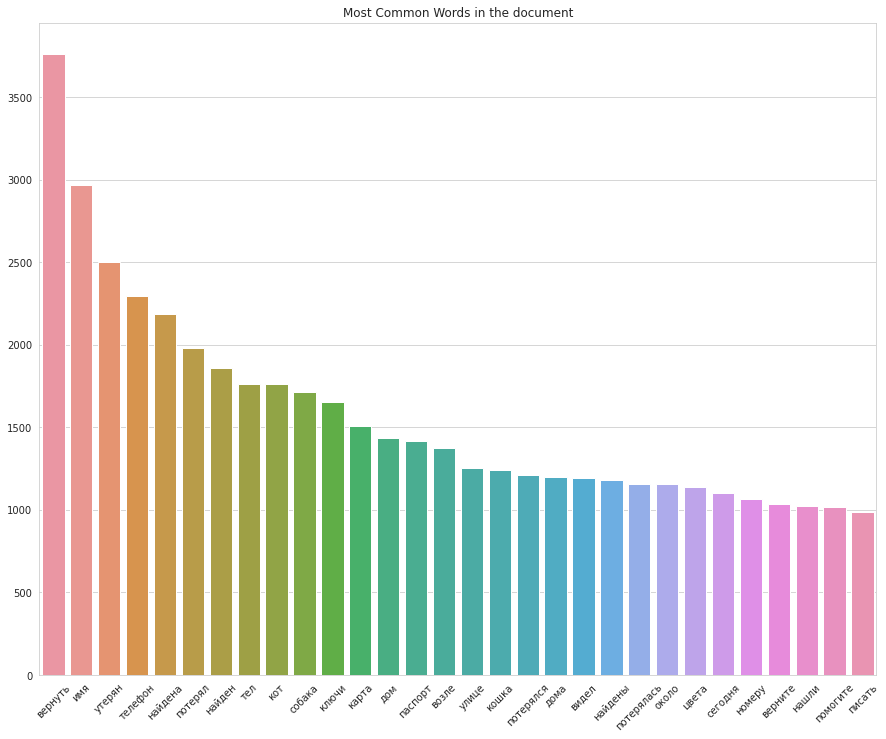

In [ ]:
from collections import Counter
word_freq_count = Counter(' '.join(df.text).split(" "))

common_words = [word[0] for word in word_freq_count.most_common(30)]
common_counts = [word[1] for word in word_freq_count.most_common(30)]

plt.figure(figsize=(15, 12))

sns.set_style("whitegrid")
sns_bar = sns.barplot(x=common_words, y=common_counts)
sns_bar.set_xticklabels(common_words, rotation=45)
plt.title('Most Common Words in the document')
plt.show()

In [ ]:
import gensim

In [ ]:
df['new_text'] = df['new_text'].apply(lambda text:gensim.summarization.keywords(text, 
         ratio=0.5,               
         words=None,              
         split=True,              
         scores=False,          
         pos_filter=('NN', 'JJ'), 
         lemmatize=True,        
         deacc=True) )

In [ ]:
df

,Unnamed: 0,id,date,text,count_likes,count_comments,count_repost,count_views,year,month,weekday,address,new_text
0,0,73591,2022-07-20 03:10:51,данном сообществе публикуем объявления потерях...,11,5,7,25720,2022,7,2,"находках, находках","[вещеи, номер, нашли, переводите, фото, пропаж..."
1,1,82763,2022-12-05 10:02:36,найден кейс наушников возле магазина магнит ра...,7,0,2,1442,2022,12,0,NaN,"[возле, кеис, которыи скажет каком, отдам влад..."
2,2,82758,2022-12-04 19:46:24,сегодня примерно утерян телефон redmi lite моу...,17,0,0,2231,2022,12,6,NaN,"[нашедшего откликнуться номеру, примерно утеря..."
3,3,82755,2022-12-04 15:01:49,сегодня примерно потеряли телефон vsmart joy а...,9,0,1,1701,2022,12,6,NaN,"[нашедшего откликнуться, примерно потеряли тел..."
4,4,82754,2022-12-04 14:59:11,уважаемые подписчики группы утерян телефон бан...,8,0,1,1231,2022,12,6,NaN,"[подписчики группы утерян, ольга александровна..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24702,25463,11,2017-05-10 05:54:36,всем привет ост юности крытого рынка утерена п...,3,0,1,1490,2017,5,2,NaN,"[привет ост юности крытого рынка утерена, доку..."
24703,25464,9,2017-05-10 05:04:23,утеряны ключи хундай,2,3,0,1443,2017,5,2,NaN,[ключи]
24704,25465,7,2017-05-08 17:53:31,нашли какую вещь ключи документы номер нашли с...,127,2,21,55400,2017,5,0,NaN,"[нашли, данное сообщество, кому либо ситуации ..."
24706,25467,4,2017-05-06 05:23:48,потеряли нашли какую либо вещь документ животн...,3,0,0,1803,2017,5,5,NaN,"[потеряннои, наиденнои, нашли какую либо вещь ..."


In [ ]:
for k in df['new_text'][0:100]:
    print(k[0:3])

['вещеи', 'номер', 'нашли']
['возле', 'кеис', 'которыи скажет каком']
['нашедшего откликнуться номеру', 'примерно утерян телефон']
['нашедшего откликнуться', 'примерно потеряли телефон']
['подписчики группы утерян', 'ольга александровна убедительная позвонить']
['мнои', 'информациеи связаться', 'подписчики группы года утерян телефон']
['субботы воскресенье примерно ленина', 'кудряков виктор алексеевич нашедшим']
['дамские перчатки']
['одна цена', 'ключи локомотива']
['собакена', 'улица хозяин']
['беспроводные наушники', 'примерное место потери дата', 'кеисе отдам']
['находил паспорт фио', 'личных сообщениях тому вернет']
['эко парке', 'цвета нашедшим']
['песик зовут', 'ошеиник дома народная']
['белыи самсунг']
['верну']
['кошелек', 'личные сообщения верну', 'мужскои картами']
['свидетельство регистрации', 'пишите личные']
['добрые люди', 'кошелек имя халисов']
['наидет', 'день сегодня', 'мешок обуви']
['кошелек такси', 'честные люди поделюсь деньгами', 'черныи']
['собаку', 'поселка']
[

In [ ]:
df = df[df['new_text'].apply(len) > 0] # удалим строки с пустыми списками сообщений

### Ищем объекты в постах (что люди потеряли). Также узнаем о чем пост (о потеряшке или что то найдено)

In [ ]:
def findByKeyWords(text, keys):
  isFound = 0
  for key in keys:
    for i in range(0, len(keys[key])):
      if(text.find(keys[key][i]) != -1):
        isFound = key
        break
    if (isFound):
      break
  return isFound

In [ ]:
keys = {
    "Часы": ["часы", "watch", "часик"],
    "Наушники": ["наушник"],
    "Флешка": ["флешк"],
    "Кошелек": ["кошел"],
    "Пропуск": ["пропус"],
    "Карта": ["карт"],
    "Бижутерия": ["браслет", "цепоч", "цепь", "сережк", "серёжк", "кольц", "колеч", "серьг"],
    "Сумка": ["сумк", "рюкз"],
    "Очки": ["очки"],
    "Ключи": ["ключ"],
    "Кошка": ["кот", "кошк", "кошечк", "майн кун"],
    "Собака": ["собак", "щенок", "собач", "пёс", 'щеноч', "пес", "щенк", "кобел", "лабрад", "терьер", "той", "хаски"],
    "Документы": ["докумен", "паспорт", "свидетельство", "снилс", "полис", "права", "билет"],
    "Телефон": ["телеф", "iphone", "huawei", "самсунг", "айфон"]
}
status = {
    "Потерян": ["проп","вернуть","ищ","остав","утер","потер"],
    "Найден": ["найд", "отдам","нашл"]
}
missed = []
status_m = []
for post in df.new_text:
  text = " ".join(post[0:3])
  if (findByKeyWords(text, keys) == 0):
    missed.append("")
  else:
    missed.append(findByKeyWords(text, keys))
  if (findByKeyWords(text, status) == 0):
    status_m.append("")
  else:
    status_m.append(findByKeyWords(text, status))

In [ ]:
df['name_oblect'], df['status_mes'] = missed, status_m

<ipython-input-109-9ae92a9ca9d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name_oblect'], df['status_mes'] = missed, status_m


In [ ]:
df.status_mes.value_counts()

           17765
Потерян     5672
Найден       702
Name: status_mes, dtype: int64

### Узнаем, что больше всего теряют или находят люди

In [ ]:
df.name_oblect.value_counts()

             9178
Кошка        3853
Собака       2361
Документы    1881
Ключи        1594
Карта        1579
Телефон      1445
Кошелек       713
Бижутерия     399
Сумка         391
Пропуск       278
Наушники      213
Очки          149
Часы           61
Флешка         44
Name: name_oblect, dtype: int64

Кошки как всегда рулят! 😆

### Получим адреса мест, где что то находили или теряли

In [ ]:
df.address.value_counts()

 Магнитогорск                 248
посёлок Крылова               118
проспект Ленина               101
посёлок Западный               66
посёлок Радужный               55
                             ... 
дом 178 и, улица Советской      1
проезд Сирененово               1
 Магнитогорск,  Оренбург        1
посёлок Ново                    1
улица Комсомольская и           1
Name: address, Length: 1383, dtype: int64

Не все посты содержат адреса. Много постов содержит мало информации, где именно нашли или потеряли.
:

In [ ]:
latitude = []
longitude = []
for address in df.address:
  try:
    geo = geolocator.geocode("Магниторгорск, " + address) 
    latitude.append(geo.latitude) 
    longitude.append(geo.longitude)
  except: 
    latitude.append(0) 
    longitude.append(0)

new_df = pd.DataFrame({'Latitude': latitude, 'Longitude': longitude})
city = df.merge(new_df,left_index=True, right_index=True)

city

,Unnamed: 0,id,date,text,count_likes,count_comments,count_repost,count_views,year,month,weekday,address,new_text,name_oblect,status_mes,Latitude,Longitude
0,0,73591,2022-07-20 03:10:51,данном сообществе публикуем объявления потерях...,11,5,7,25720,2022,7,2,"находках, находках","[вещеи, номер, нашли, переводите, фото, пропаж...",,Найден,42.82507,132.89394
1,1,82763,2022-12-05 10:02:36,найден кейс наушников возле магазина магнит ра...,7,0,2,1442,2022,12,0,NaN,"[возле, кеис, которыи скажет каком, отдам влад...",Кошка,,0.00000,0.00000
2,2,82758,2022-12-04 19:46:24,сегодня примерно утерян телефон redmi lite моу...,17,0,0,2231,2022,12,6,NaN,"[нашедшего откликнуться номеру, примерно утеря...",Телефон,Потерян,0.00000,0.00000
3,3,82755,2022-12-04 15:01:49,сегодня примерно потеряли телефон vsmart joy а...,9,0,1,1701,2022,12,6,NaN,"[нашедшего откликнуться, примерно потеряли тел...",Телефон,Потерян,0.00000,0.00000
4,4,82754,2022-12-04 14:59:11,уважаемые подписчики группы утерян телефон бан...,8,0,1,1231,2022,12,6,NaN,"[подписчики группы утерян, ольга александровна...",,Потерян,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24134,24884,1455,2017-09-24 15:42:05,найдены ключи водитель отзовись,1,0,0,869,2017,9,6,NaN,[ключи водитель],Ключи,,0.00000,0.00000
24135,24885,1453,2017-09-24 08:26:19,утеряна флэшка kingston цвет белая фиолетовым ...,1,0,0,680,2017,9,6,NaN,"[колпачком вернуть, флэшка kingston]",,Потерян,0.00000,0.00000
24136,24886,1449,2017-09-24 06:36:01,ночь утерян телефон samsung dual цвет белый вы...,0,2,0,641,2017,9,6,NaN,"[такси, позвонил, сказал хотя, утерян телефон ...",,,0.00000,0.00000
24137,24887,1447,2017-09-23 08:48:14,найдена карта отдали куб труда,0,0,0,704,2017,9,5,улица Труда,"[куб, карта]",Карта,,0.00000,0.00000


In [ ]:
city = city.loc[city.Latitude > 0].reset_index(drop=True)
city = city.drop('Unnamed: 0', axis=1, errors='ignore')
city.to_csv("/content/drive/My Drive/datasets/itmo_project_finding_folium.csv")

In [ ]:
city = pd.read_csv("/content/drive/My Drive/datasets/itmo_project_finding_folium.csv")
city = city.drop('Unnamed: 0', axis=1, errors='ignore')

In [ ]:
city.head()

,id,date,text,count_likes,count_comments,count_repost,count_views,year,month,weekday,address,new_text,name_oblect,status_mes,Latitude,Longitude
0,73591,2022-07-20 03:10:51,данном сообществе публикуем объявления потерях...,11,5,7,25720,2022,7,2,"находках, находках","['вещеи', 'номер', 'нашли', 'переводите', 'фот...",NaN,Найден,42.825070,132.893940
1,82711,2022-12-03 17:47:52,найден кошелёк мужской картами дворе дома улиц...,9,0,1,1323,2022,12,5,"дом 22, улица Ленинградской","['кошелек', 'личные сообщения верну', 'мужскои...",Кошелек,NaN,53.418150,58.983900
2,82653,2022-12-02 20:00:11,потерял собачку находится доменщиков постоянно...,25,0,0,1287,2022,12,4,NaN,"['собачку', 'доменщиков постоянно']",Собака,NaN,53.421501,58.984171
3,82611,2022-12-02 15:12:17,сегодня утром декабря найдены часы район завен...,0,0,1,572,2022,12,4,NaN,"['утром декабря', 'писать личные', 'наидены']",NaN,NaN,53.361950,58.984145
4,82589,2022-12-02 06:34:29,утеряны документы степанов сергей александрови...,6,1,0,900,2022,12,4,NaN,"['кошелек', 'документы степанов', 'поскользнул...",Кошелек,NaN,53.388510,59.071964


In [ ]:
city.fillna('', inplace = True)

In [ ]:
city.address.value_counts()

                                         3138
 Магнитогорск                              44
проспект Ленина                            23
посёлок Крылова                            17
посёлок Западный                           11
                                         ... 
село Лушей                                  1
улица Магнитная, посёлок Коммунальный       1
проспект Ленина, дом 49                     1
площадь Комсомольской                       1
бульвар Ручьева и, улица Б                  1
Name: address, Length: 347, dtype: int64

Многие адреса не относятся к городу Магнитогорску. Уберем их. 

In [ ]:
address_drop = []
for i in range(0, city.address.count()):
  if  not 53<city.Latitude[i]<54:
    address_drop.append (city.index[i])
  elif  not 58<city.Longitude[i]<60:
    address_drop.append (city.index[i])
  else:
    if city.address[i] =='Магнитогорск' or city.address[i] ==' Магнитогорск' or city.address[i] =='':
      address_drop.append (city.index[i])

In [ ]:
for item in address_drop:
  city.drop(city[city.index == item].index, inplace = True)

In [ ]:
city.address.value_counts()

проспект Ленина                           22
посёлок Крылова                           16
улица 50 лет                              10
посёлок Западный                          10
посёлок Радужный                           9
                                          ..
переулок Советском, переулок Советский     1
село Лушей                                 1
улица Магнитная, посёлок Коммунальный      1
проспект Ленина, дом 49                    1
бульвар Ручьева и, улица Б                 1
Name: address, Length: 327, dtype: int64

In [ ]:
city.reset_index(drop=True, inplace=True)
map_mgn = folium.Map(location=[53.407860, 58.985610], zoom_start=12)

for i in range(0, city.address.count()):
  c = city.loc[city.address == city.address[i]].groupby(city.address,as_index=False).size()
  #c.reset_index(drop=True, inplace=True)
  if(c['size'][0] < 2):
    folium.Marker([city.Latitude[i], city.Longitude[i]], popup = (str(c['size'][0]) + "шт. потеряшек"), icon=folium.Icon(color = 'green', icon="cloud")).add_to(map_mgn)
  elif (c['size'][0] < 10):
    folium.Marker([city.Latitude[i], city.Longitude[i]], popup = (str(c['size'][0]) + "шт. потеряшек"), icon=folium.Icon(color = 'orange', icon="cloud")).add_to(map_mgn)
  else:
    folium.Marker([city.Latitude[i], city.Longitude[i]], popup = (str(c['size'][0]) + "шт. Здесь Бермудский треугольник потеряных вещей!"), icon=folium.Icon(color = 'red', icon='cloud')).add_to(map_mgn)
  

map_mgn

### Анализ содержимого постов

In [ ]:
city = pd.read_csv("/content/drive/My Drive/datasets/itmo_project_finding_folium.csv")
city = city.drop('Unnamed: 0', axis=1, errors='ignore')
city

,id,date,text,count_likes,count_comments,count_repost,count_views,year,month,weekday,address,new_text,name_oblect,status_mes,Latitude,Longitude
0,73591,2022-07-20 03:10:51,данном сообществе публикуем объявления потерях...,11,5,7,25720,2022,7,2,"находках, находках","['вещеи', 'номер', 'нашли', 'переводите', 'фот...",NaN,Найден,42.825070,132.893940
1,82711,2022-12-03 17:47:52,найден кошелёк мужской картами дворе дома улиц...,9,0,1,1323,2022,12,5,"дом 22, улица Ленинградской","['кошелек', 'личные сообщения верну', 'мужскои...",Кошелек,NaN,53.418150,58.983900
2,82653,2022-12-02 20:00:11,потерял собачку находится доменщиков постоянно...,25,0,0,1287,2022,12,4,NaN,"['собачку', 'доменщиков постоянно']",Собака,NaN,53.421501,58.984171
3,82611,2022-12-02 15:12:17,сегодня утром декабря найдены часы район завен...,0,0,1,572,2022,12,4,NaN,"['утром декабря', 'писать личные', 'наидены']",NaN,NaN,53.361950,58.984145
4,82589,2022-12-02 06:34:29,утеряны документы степанов сергей александрови...,6,1,0,900,2022,12,4,NaN,"['кошелек', 'документы степанов', 'поскользнул...",Кошелек,NaN,53.388510,59.071964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3781,1528,2017-10-05 02:52:52,найдено свидетельство регистрации имя сунагату...,3,0,1,706,2017,10,3,NaN,"['вадима равилевича', 'свидетельство регистрац...",Документы,NaN,53.362980,58.980040
3782,1509,2017-10-03 06:44:07,утеряна связка ключей примерно левом берегу на...,1,0,0,668,2017,10,1,NaN,"['связка', 'берегу нашедшим', 'ключеи']",Ключи,NaN,53.422656,58.972255
3783,1486,2017-09-29 09:07:31,найдена маска ныряния детская берегу озера чеб...,0,0,0,679,2017,9,4,NaN,"['камышеи', 'маска ныряния', 'чебачьем']",NaN,NaN,53.419210,58.989920
3784,1461,2017-09-25 17:02:14,потерял штаны,1,0,0,721,2017,9,0,NaN,['потерял'],NaN,Потерян,53.426793,58.935590


In [ ]:
city.columns

Index(['id', 'date', 'text', 'count_likes', 'count_comments', 'count_repost',
       'count_views ', 'year', 'month', 'weekday', 'address', 'new_text',
       'name_oblect', 'status_mes', 'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
df = city[['text','count_likes', 'count_comments', 'count_repost',
       'count_views ', 'new_text','name_oblect', 'status_mes']]
df

,text,count_likes,count_comments,count_repost,count_views,new_text,name_oblect,status_mes
0,данном сообществе публикуем объявления потерях...,11,5,7,25720,"['вещеи', 'номер', 'нашли', 'переводите', 'фот...",NaN,Найден
1,найден кошелёк мужской картами дворе дома улиц...,9,0,1,1323,"['кошелек', 'личные сообщения верну', 'мужскои...",Кошелек,NaN
2,потерял собачку находится доменщиков постоянно...,25,0,0,1287,"['собачку', 'доменщиков постоянно']",Собака,NaN
3,сегодня утром декабря найдены часы район завен...,0,0,1,572,"['утром декабря', 'писать личные', 'наидены']",NaN,NaN
4,утеряны документы степанов сергей александрови...,6,1,0,900,"['кошелек', 'документы степанов', 'поскользнул...",Кошелек,NaN
...,...,...,...,...,...,...,...,...
3781,найдено свидетельство регистрации имя сунагату...,3,0,1,706,"['вадима равилевича', 'свидетельство регистрац...",Документы,NaN
3782,утеряна связка ключей примерно левом берегу на...,1,0,0,668,"['связка', 'берегу нашедшим', 'ключеи']",Ключи,NaN
3783,найдена маска ныряния детская берегу озера чеб...,0,0,0,679,"['камышеи', 'маска ныряния', 'чебачьем']",NaN,NaN
3784,потерял штаны,1,0,0,721,['потерял'],NaN,Потерян


In [ ]:
df.fillna('', inplace = True)
df_train = df[(df.name_oblect!='')& (df.status_mes != '')]
df_train

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,text,count_likes,count_comments,count_repost,count_views,new_text,name_oblect,status_mes
16,срочно ищем хозяев котика нашли возле посёлка ...,20,6,0,1199,"['придется выпустить', 'ищем хозяев котика наш...",Кошка,Потерян
37,потерялась кошка ленинском первомайская потеря...,9,7,0,949,['кончик хвоста переломан видел подобрал верну...,Кошка,Потерян
41,потеряла карту куб зеленого цвета имя татьяна ...,5,0,1,1157,"['вернуть писать', 'карту куб зеленого']",Карта,Потерян
42,найденного котика никто ищет никто откликнулся...,13,0,1,1032,"['котика никто', 'сухои корм вкусняшек отказыв...",Кошка,Потерян
63,сегодня маршрутке приблизительно часов оставил...,8,1,0,1291,['маршрутке приблизительно часов оставил кресл...,Наушники,Потерян
...,...,...,...,...,...,...,...,...
3764,семейного парка бегает собачка возможно чья по...,16,1,7,1412,['хромает просто холода сфотографировать норма...,Собака,Потерян
3767,октября утеряны ключи плюс синий ключ домофона...,3,2,0,695,"['гостиныи двор', 'утеряны ключи плюс']",Ключи,Потерян
3771,потерялся кот кличка кузя аскарово мраморного ...,3,0,1,745,"['либо', 'кот кличка кузя аскарово мраморного'...",Кошка,Потерян
3778,помогите найти собаку сегодня утром первой шко...,8,2,2,773,"['наити', 'собакои буквально минуты пропал над...",Собака,Потерян


In [ ]:
df.sort_values(by= 'count_repost', ascending = False).head(20)

,text,count_likes,count_comments,count_repost,count_views,new_text,name_oblect,status_mes
439,косой ребёнок поиске добрых рук осмотрена клин...,443,30,124,22216,['подарочек отдаю взрослым людям самовыгула пр...,,
588,хозяева уезжают город отдают хорошие руки соба...,237,81,60,34300,"['уезжают город', 'руки собаке']",Собака,
504,найден кот адресу западное шоссе напуган,462,31,52,19094,"['шоссе', 'кот адресу']",Кошка,
175,бросили саду оставили друга закончился урожайн...,328,22,52,9306,"['молодои', 'саду оставили друга закончился', ...",,Потерян
637,потерял друга нашли карадырской,265,5,29,6707,['друга нашли'],,Найден
473,отдадим котёнка добрые руки нашли улице остави...,108,5,28,4334,"['котенка добрые руки', 'собака кошка обращать...",Кошка,
672,потерял кошечку нашла машиной район зеленого л...,252,72,28,12451,"['кошечку нашла', 'лога находится']",Кошка,Найден
71,милый кошачий ребёнок хочет домой живёт около ...,135,2,28,5158,"['кошачии', 'наидитесь добрые', 'ребенок хочет...",,
1228,найден электросaмoкт входа экопарк лесопарково...,7,11,27,3863,"['верну', 'электросaмoкт входа']",,
566,помощи найти кошку вид года одна мразь наиграл...,137,8,27,7035,"['знает', 'все', 'наити кошку вид года одна', ...",Кошка,


Видим, что status_mes плохо разметили. Явно, здесь записаны находки, а не потеряшки.
Реализуем иной подход, попробуем разбить все посты на 2 кластера (предполагая, что одни посты будут лежать в кластере - находки, а другие, в кластере - потеряшки)

In [ ]:
from tqdm.auto import tqdm, trange
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
import re

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian")

In [ ]:
stopwords = nltk.corpus.stopwords.words('russian')


In [ ]:
def token_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[а-яА-Я]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


In [ ]:
n_featur=200000
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                                 min_df=0.01, stop_words=stopwords,
                                 use_idf=True, tokenizer=token_and_stem, ngram_range=(1,3))

In [ ]:

%%time
tfidf_matrix = tfidf_vectorizer.fit_transform(city.new_text)


CPU times: user 2.25 s, sys: 7 ms, total: 2.26 s
Wall time: 2.28 s


In [ ]:
type(tfidf_matrix)
tfidf_matrix


<3786x96 sparse matrix of type '<class 'numpy.float64'>'
	with 7374 stored elements in Compressed Sparse Row format>

In [ ]:
print(tfidf_matrix.shape)

(3786, 96)


In [ ]:
num_clusters = 2

# Метод к-средних - KMeans
from sklearn.cluster import KMeans
km = KMeans(n_clusters=num_clusters)

In [ ]:
%%time
idx = km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

print(clusters)
print (km.labels_)



[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 

In [ ]:
frame = pd.DataFrame(city.new_text)


out = { 'new_text': city.new_text, 'cluster': clusters}
frame = pd.DataFrame(out, columns = ['new_text', 'cluster'])
frame

,new_text,cluster
0,"['вещеи', 'номер', 'нашли', 'переводите', 'фот...",0
1,"['кошелек', 'личные сообщения верну', 'мужскои...",0
2,"['собачку', 'доменщиков постоянно']",0
3,"['утром декабря', 'писать личные', 'наидены']",0
4,"['кошелек', 'документы степанов', 'поскользнул...",0
...,...,...
3781,"['вадима равилевича', 'свидетельство регистрац...",0
3782,"['связка', 'берегу нашедшим', 'ключеи']",1
3783,"['камышеи', 'маска ныряния', 'чебачьем']",0
3784,['потерял'],0


In [ ]:
for item in frame[frame.cluster == 0].new_text[0:10]:
  print(item)

['вещеи', 'номер', 'нашли', 'переводите', 'фото', 'пропажах', 'находках', 'сообществе публикуем объявления', 'либо вещь документ животного нажмите предложить новость вверху стены напишите текст', 'ждите звонков мошенников', 'обрезаем закрываем', 'предлогом']
['кошелек', 'личные сообщения верну', 'мужскои картами']
['собачку', 'доменщиков постоянно']
['утром декабря', 'писать личные', 'наидены']
['кошелек', 'документы степанов', 'поскользнулся упал']
['палады', 'потерял сквера']
['телефон redmi note ноября рядом', 'отвалилась пожалуста напишите личку видели']
['хозяин']
['помогите', 'сережка ленина']
['забрать убежала спрыгнула подвал', 'карла маркса улицы кошка породистая']


In [ ]:
df['cluster'] = clusters
df

<ipython-input-195-61e39b91f033>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = clusters


,text,count_likes,count_comments,count_repost,count_views,new_text,name_oblect,status_mes,cluster
0,данном сообществе публикуем объявления потерях...,11,5,7,25720,"['вещеи', 'номер', 'нашли', 'переводите', 'фот...",,Найден,0
1,найден кошелёк мужской картами дворе дома улиц...,9,0,1,1323,"['кошелек', 'личные сообщения верну', 'мужскои...",Кошелек,,0
2,потерял собачку находится доменщиков постоянно...,25,0,0,1287,"['собачку', 'доменщиков постоянно']",Собака,,0
3,сегодня утром декабря найдены часы район завен...,0,0,1,572,"['утром декабря', 'писать личные', 'наидены']",,,0
4,утеряны документы степанов сергей александрови...,6,1,0,900,"['кошелек', 'документы степанов', 'поскользнул...",Кошелек,,0
...,...,...,...,...,...,...,...,...,...
3781,найдено свидетельство регистрации имя сунагату...,3,0,1,706,"['вадима равилевича', 'свидетельство регистрац...",Документы,,0
3782,утеряна связка ключей примерно левом берегу на...,1,0,0,668,"['связка', 'берегу нашедшим', 'ключеи']",Ключи,,1
3783,найдена маска ныряния детская берегу озера чеб...,0,0,0,679,"['камышеи', 'маска ныряния', 'чебачьем']",,,0
3784,потерял штаны,1,0,0,721,['потерял'],,Потерян,0


In [ ]:
df.sort_values(by= 'count_repost', ascending = False).head(20)

,text,count_likes,count_comments,count_repost,count_views,new_text,name_oblect,status_mes,cluster
439,косой ребёнок поиске добрых рук осмотрена клин...,443,30,124,22216,['подарочек отдаю взрослым людям самовыгула пр...,,,0
588,хозяева уезжают город отдают хорошие руки соба...,237,81,60,34300,"['уезжают город', 'руки собаке']",Собака,,0
504,найден кот адресу западное шоссе напуган,462,31,52,19094,"['шоссе', 'кот адресу']",Кошка,,0
175,бросили саду оставили друга закончился урожайн...,328,22,52,9306,"['молодои', 'саду оставили друга закончился', ...",,Потерян,0
637,потерял друга нашли карадырской,265,5,29,6707,['друга нашли'],,Найден,0
473,отдадим котёнка добрые руки нашли улице остави...,108,5,28,4334,"['котенка добрые руки', 'собака кошка обращать...",Кошка,,0
672,потерял кошечку нашла машиной район зеленого л...,252,72,28,12451,"['кошечку нашла', 'лога находится']",Кошка,Найден,0
71,милый кошачий ребёнок хочет домой живёт около ...,135,2,28,5158,"['кошачии', 'наидитесь добрые', 'ребенок хочет...",,,0
1228,найден электросaмoкт входа экопарк лесопарково...,7,11,27,3863,"['верну', 'электросaмoкт входа']",,,0
566,помощи найти кошку вид года одна мразь наиграл...,137,8,27,7035,"['знает', 'все', 'наити кошку вид года одна', ...",Кошка,,0


In [ ]:
df.cluster.value_counts()

0    3587
1     199
Name: cluster, dtype: int64

In [ ]:
for item in df[df.cluster==0]['new_text'][0:10]:
  print(item)

['вещеи', 'номер', 'нашли', 'переводите', 'фото', 'пропажах', 'находках', 'сообществе публикуем объявления', 'либо вещь документ животного нажмите предложить новость вверху стены напишите текст', 'ждите звонков мошенников', 'обрезаем закрываем', 'предлогом']
['кошелек', 'личные сообщения верну', 'мужскои картами']
['собачку', 'доменщиков постоянно']
['утром декабря', 'писать личные', 'наидены']
['кошелек', 'документы степанов', 'поскользнулся упал']
['палады', 'потерял сквера']
['телефон redmi note ноября рядом', 'отвалилась пожалуста напишите личку видели']
['хозяин']
['помогите', 'сережка ленина']
['забрать убежала спрыгнула подвал', 'карла маркса улицы кошка породистая']


In [ ]:
for item in df[df.cluster==1]['new_text'][0:100]:
  print(item)

['связка', 'человечик якорь', 'ключеи']
['ключи', 'сторожеи автостоянки', 'находятся', 'зеленыи', 'дома']
['ключи автомобиля', 'лог нашедшего']
['старлаин', 'ключи автомобиля адресу сталеваров', 'брелок сигнализации']
['советскои нашедшему', 'ключи машины брелок', 'лога']
['обращаться', 'ключи']
['ключи возле']
['ключи', 'бисернои']
['ключи', 'памятника']
['ключи']
['ключи автостоянке', 'мост остановке']
['ключа', 'дома карла', 'детскои']
['ключи', 'сумку серенькую ворошилова', 'мож находил']
['ключ']
['раион', 'ключи синих интерсвязь', 'домоуправление']
['нашел', 'ключеи', 'возле дома вокзальная оставлен', 'связка']
['нашел', 'ключ']
['ключ автомобиля', 'нашедшему написать']
['сосновая магазин', 'ключи обращать']
['бадене', 'ключи парни']
['сергеи', 'ключ такси', 'номер связи', 'белыи']
['ключ автомобиля']
['брелком', 'ключи']
['passat', 'ключи']
['ключи отдам']
['passat', 'ключи']
['ключи', 'сада советская']
['сиреневыи ключах', 'ключи офисном']
['ключи', 'верну', 'детскои']
['ключи 

In [ ]:
df[(df.name_oblect == "Ключи") & (df.cluster == 1)]

,text,count_likes,count_comments,count_repost,count_views,new_text,name_oblect,status_mes,cluster
8,утеряны связка ключей квартиры связке брелока ...,5,0,0,1196,"['связка', 'человечик якорь', 'ключеи']",Ключи,,1
9,найдены ключи авто торце дома зеленый лог возл...,4,4,1,1518,"['ключи', 'сторожеи автостоянки', 'находятся',...",Ключи,,1
11,утеряны ключи автомобиля дворе дома зеленый ло...,6,0,0,1807,"['ключи автомобиля', 'лог нашедшего']",Ключи,,1
13,утеряны ключи автомобиля адресу сталеваров пар...,3,0,0,1028,"['старлаин', 'ключи автомобиля адресу сталевар...",Ключи,,1
22,утеряны ключи машины брелок стар лайн связке з...,2,0,0,928,"['советскои нашедшему', 'ключи машины брелок',...",Ключи,,1
...,...,...,...,...,...,...,...,...,...
3698,найдены ключи форд шкода около поликлинике,0,1,0,726,"['ключи', 'шкода около']",Ключи,,1
3715,найдены ключи около школы,1,0,0,1218,['ключи около'],Ключи,,1
3734,потеряны ключи машины квартиры пересечения жук...,2,4,0,918,"['ключи машины', 'лет магнитке']",Ключи,,1
3743,найдены ключи дружбы суворова верну владельцу,4,1,0,1082,"['ключи', 'суворова верну']",Ключи,,1


Кластеризация разделила все посты, однако видно, что к кластеру 1 - относятся посты, содержащие информацию о потерях или находках ключей, соответсвенно 0 - кластер - это все остальные предметы.